# Twitter-Scrapping — Sentiment Analysis en Español  

**Autor del notebook:** José Luis Medrano Cerdas  

Este trabajo implementa un flujo completo de *análisis de sentimientos* en mensajes cortos en español mediante técnicas de *Procesamiento de Lenguaje Natural (NLP)* y algoritmos de *clasificación supervisada* [1]–[3]. El documento completo y el código fuente pueden consultarse en el repositorio de GitHub [Twitter-Scrapping — Sentiment Analysis en Español](https://github.com/jlmedranoc/Twitter-Scrapping) [8].  

## Dataset  
El análisis está basado en un conjunto de datos diseñado para el estudio de sentimientos en mensajes escritos en español, utilizando el dataset público de San Martín [4], que contiene *2590 registros* extraídos desde la red social Twitter.  

Cada registro incluye:  
- `user`: identificador del usuario que envió el mensaje corto.  
- `text`: mensaje en español.  
- `date`: fecha y hora del mensaje.  
- `emotion`: emoción del mensaje, una de 20 posibles emociones.  
- `sentiment`: sentimientos asociados y definidos según el dataset, que contempla `{ joyful, mad, peaceful, powerful, sad, scared }`.  

## Metodología  
La metodología aplicada inicia con un proceso de preprocesamiento del texto que normaliza y prepara los mensajes antes de la vectorización y clasificación:  

1. *Preprocesamiento del texto*  
El proceso incluyó la eliminación de columnas no requeridas, el conteo de la frecuencia de las clases en la columna `sentiment` y la normalización del contenido con conversión a minúsculas y filtrado de caracteres no alfabéticos. La tokenización permitió dividir los textos en palabras, y las *stopwords* en español fueron eliminadas utilizando la lista publicada por Dedhia [5]. Finalmente, se aplicó el *Snowball Stemmer* de NLTK [6] para reducir las palabras a sus raíces.  

2. *Vectorización*  
Los textos fueron transformados en representaciones numéricas mediante la técnica *bag-of-words*, lo que habilitó a los algoritmos de clasificación a trabajar en un espacio vectorial.  

3. *Clasificación*  
El análisis incluyó tres algoritmos reconocidos en el aprendizaje supervisado:  
   - *Naive Bayes*: clasificador probabilístico basado en el teorema de Bayes.  
   - *Regresión Logística*: modelo lineal que estima probabilidades de clase.  
   - *Support Vector Machines (SVM)*: método robusto que maximiza márgenes de separación entre clases en espacios de alta dimensión [1]–[3].  

Cada algoritmo se entrenó tanto con texto limpio como con texto reducido mediante *stemming*.  

4. *Evaluación*  
El desempeño de los modelos fue evaluado utilizando una partición 75/25 en entrenamiento y prueba, y métricas de *accuracy, precisión, recall* y *F1-score*. Los seis experimentos realizados permitieron también valorar el impacto del *stemming* en el rendimiento de los clasificadores.  

## Resultados  
El análisis comparativo evidenció que el mejor desempeño correspondió al modelo SVM aplicado al texto limpio, con una exactitud de aproximadamente 77%. En contraste, el peor resultado se obtuvo con Naive Bayes sobre texto reducido por *stemming*, alcanzando una exactitud cercana al 59%. Estos hallazgos confirman que el *stemming* no mejoró el rendimiento en español y, en ciertos casos, redujo la capacidad de clasificación al distorsionar las palabras.  

## Referencias bibliográficas  
[1] C. D. Manning, P. Raghavan, and H. Schütze, *Introduction to Information Retrieval*. Cambridge, U.K.: Cambridge Univ. Press, 2008.  
[2] S. Bird, E. Klein, and E. Loper, *Natural Language Processing with Python*. Sebastopol, CA, USA: O’Reilly Media, 2009.  
[3] F. Pedregosa et al., “Scikit-learn: Machine Learning in Python,” *J. Mach. Learn. Res.*, vol. 12, pp. 2825–2830, 2011.  
[4] P. San Martín, “Sentiment Analysis in Spanish Tweets,” Kaggle, 2020. [Online]. Available: https://www.kaggle.com/datasets/philipsanm/sentiment-analysis-in-spanish-tweets/data  
[5] H. Dedhia, “Stop words in 28 languages,” Kaggle, 2018. [Online]. Available: https://www.kaggle.com/datasets/heeraldedhia/stop-words-in-28-languages  
[6] NLTK Documentation. [Online]. Available: https://www.nltk.org/  
[7] Scikit-learn Documentation. [Online]. Available: https://scikit-learn.org/stable/  
[8] J. L. Medrano Cerdas, “Twitter-Scrapping — Sentiment Analysis en Español,” GitHub, 2025. [Online]. Available: https://github.com/jlmedranoc/Twitter-Scrapping  


# 1. Carga de datos

Para el análisis se utilizó el archivo `sentiment_analysis_dataset.csv`, disponible en el repositorio [Dataset](https://github.com/jlmedranoc/Twitter-Scrapping.git), que contiene la colección de mensajes empleada en el estudio de sentimientos. Adicionalmente, se hizo uso de la lista de *stopwords* publicada en [Stop words in 28 languages](https://www.kaggle.com/datasets/heeraldedhia/stop-words-in-28-languages) [5]. Con el fin de acceder a los datos, fue necesario clonar el repositorio de GitHub y posteriormente importar las librerías requeridas para la manipulación y visualización de información, como *pandas* y *matplotlib*. Una vez clonado el repositorio, se definió la ruta al archivo *sentiment_analysis_dataset.csv* y se cargó su contenido en un DataFrame de pandas denominado *datasetTScrapping*. Finalmente, para validar la correcta importación, se mostraron las primeras filas del dataset, se verificó el tamaño total en términos de registros y columnas, y se listaron las variables disponibles para su posterior procesamiento y análisis.

In [ ]:
#Clona el repositorio de GitHub
!git clone https://github.com/jlmedranoc/Twitter-Scrapping.git

#Importar librerías
import pandas as pd
import matplotlib.pyplot as plt

fatal: destination path 'Twitter-Scrapping' already exists and is not an empty directory.


In [ ]:
#Establece la ruta del archivo clonado
rutaArchivo = '/content/Twitter-Scrapping/sentiment_analysis_dataset.csv'

#Carga el dataset
datasetTScrapping = pd.read_csv(rutaArchivo)

In [ ]:
#Imprime el encabezado del dataset
datasetTScrapping.head()

,user,text,date,emotion,sentiment
0,@erreborda,termine bien abrumado después de hoy,"Jan 6, 2024 · 2:53 AM UTC",overwhelmed,scared
1,@shpiderduck,me siento abrumado,"Jan 6, 2024 · 2:35 AM UTC",overwhelmed,scared
2,@Alex_R_art,Me siento un poco abrumado por la cantidad de ...,"Jan 6, 2024 · 12:20 AM UTC",overwhelmed,scared
3,@anggelinaa97,Salvador la única persona que no la ha abrumad...,"Jan 5, 2024 · 10:38 PM UTC",overwhelmed,scared
4,@diegoreyesvqz,Denme un helado o algo que ando full abrumado.,"Jan 5, 2024 · 8:38 PM UTC",overwhelmed,scared


In [ ]:
#Imprime el tamaño del dataset
datasetTScrapping.shape

(2590, 5)

In [ ]:
#Muestra el nombre de las columnas del dataset
datasetTScrapping.columns

Index(['user', 'text', 'date', 'emotion', 'sentiment'], dtype='object')

# 2. Elimina campos

En este paso se eliminan las columnas `user`, `date` y `emotion` por no ser necesarias para el análisis, posteriormente, se valida el resultado visualizando las primeras filas del dataset y comprobando que las columnas restantes corresponden únicamente a las variables requeridas para el estudio.

In [ ]:
#Elimina algunas columnas que no son requeridas para el análisis
datasetTScrapping = datasetTScrapping.drop(['user', 'date', 'emotion'], axis=1)

#Muestra los datos para validar que ya no estan esas columnas
datasetTScrapping.head()

,text,sentiment
0,termine bien abrumado después de hoy,scared
1,me siento abrumado,scared
2,Me siento un poco abrumado por la cantidad de ...,scared
3,Salvador la única persona que no la ha abrumad...,scared
4,Denme un helado o algo que ando full abrumado.,scared


In [ ]:
#Muestra las columnas existentes en el Dataset
datasetTScrapping.columns

Index(['text', 'sentiment'], dtype='object')

# 3. Frecuencias y graficos

En las siguientes celdas se analizan las clases de la columna `sentiment` mediante el cálculo de sus frecuencias absolutas y relativas, primero, se obtiene el conteo de ocurrencias por clase y se calcula el porcentaje correspondiente a cada categoría con dos decimales, posteriormente, se visualizan los resultados a través de un gráfico de barras que muestra la frecuencia de cada clase con sus valores numéricos, y de un gráfico circular que representa la distribución porcentual, lo que facilita comprender la proporción de cada sentimiento dentro del conjunto de datos.

In [ ]:
#Importa librería requerida
import matplotlib.pyplot as plt

#Cuenta la frecuencia de cada clase en la columna 'sentiment'
frecuencias = datasetTScrapping['sentiment'].value_counts()

#Calcula porcentaje de las clases
porcentajes = datasetTScrapping['sentiment'].value_counts(normalize=True) * 100

In [ ]:
#Muestra los resultados de las frecuencias de los datos
frecuencias

,count
sentiment,
peaceful,660
mad,530
powerful,420
sad,360
joyful,350
scared,270


In [ ]:
#Muestra los datos de manera porcentual con dos digitos decimales
porcentajes.round(2)

,proportion
sentiment,
peaceful,25.48
mad,20.46
powerful,16.22
sad,13.90
joyful,13.51
scared,10.42


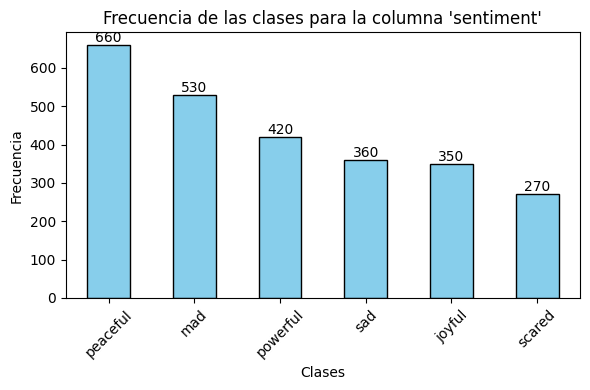

In [ ]:
#Muestra un gráfico de barras para representar la frecuencia de las clases de la columna 'sentiment'
plt.figure(figsize=(6,4))
ax = frecuencias.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title("Frecuencia de las clases para la columna 'sentiment'")
plt.xlabel("Clases")
plt.ylabel("Frecuencia")
plt.xticks(rotation=45)

#Agrega los valores encima de cada barra
for p in ax.patches:
    ax.annotate(
        str(p.get_height()),
        (p.get_x() + p.get_width() / 2, p.get_height()),
        ha='center', va='bottom'
    )

plt.tight_layout()
plt.show()

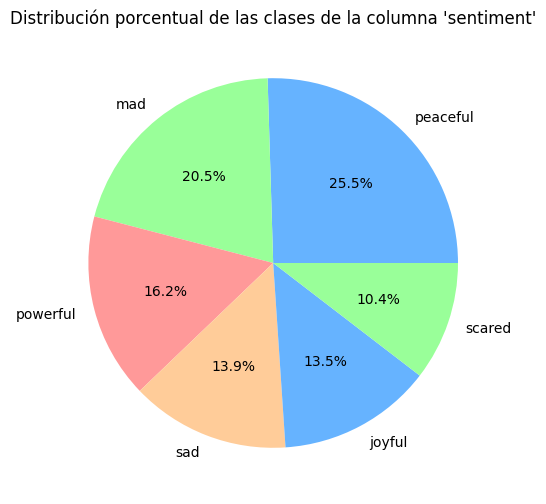

In [ ]:
#Muestra un gráfico circular
plt.figure(figsize=(6,6))
porcentajes.plot(kind='pie', autopct='%1.1f%%', colors=['#66b3ff','#99ff99','#ff9999','#ffcc99'])
plt.ylabel("")
plt.title("Distribución porcentual de las clases de la columna 'sentiment'")
plt.show()

# 4. Stopwords

Mediante código se cargan las *stopwords* en español desde la ruta https://www.kaggle.com/datasets/philipsanm/, lo cual es necesaria para el preprocesamiento de texto, para ello, se establece la ruta del archivo `spanish.txt` contenido en el repositorio clonado y se leen todas las palabras mediante la función `open`, generando una lista en Python. Posteriormente, se imprime la cantidad total de *stopwords* cargadas y se muestra un ejemplo de las primeras veinte palabras, lo que permite verificar que el archivo fue leído correctamente y que la lista está disponible para eliminar términos irrelevantes durante el análisis de los textos.

In [ ]:
#Ruta de archivo de stopwords en español
rutaArchivoStopwords = '/content/Twitter-Scrapping/spanish.txt'

#Lee los stopwords desde el archivo en español
with open(rutaArchivoStopwords, encoding='utf-8') as f:
    stopwords = f.read().splitlines()

In [ ]:
#Muestra el total de stopwords
print("Total de stopwords cargadas:", len(stopwords))

Total de stopwords cargadas: 308


In [ ]:
#Muestra un listado de 20 stopwords del archivo como ejemplo
print("Ejemplo de stopwords del archivo:", stopwords[:20])

Ejemplo de stopwords del archivo: ['a', 'al', 'algo', 'algunas', 'algunos', 'ante', 'antes', 'como', 'con', 'contra', 'cual', 'cuando', 'de', 'del', 'desde', 'donde', 'durante', 'e', 'el', 'ella']


# 5. Limpieza

Mediante las siguientes celdas fue implementada la función de limpieza del texto, donde cada mensaje se convierte a minúsculas, se eliminan caracteres no alfabéticos, se tokeniza en palabras y se filtran las *stopwords* en español, el resultado se almacena en una nueva columna llamada `Texto_limpio`, que contiene las listas de palabras procesadas. Finalmente, se validan los cambios mostrando las columnas disponibles en el dataset y comparando el texto original con su versión limpia.

In [ ]:
#Importa librerias
import re
from IPython.display import display

In [ ]:
#Función de limpieza, para lo cual convierte a minúsculas, filtra y deja solo caracteres alfabéticos y espacios, realiza tokenización y elimina stopwords
def limpiarTexto(texto):
    texto = texto.lower()
    texto = re.sub(r'[^a-záéíóúüñ\s]', '', texto)
    tokens = texto.split()
    tokens = [palabra for palabra in tokens if palabra not in stopwords]
    return tokens

In [ ]:
#Crea nueva columna con texto limpio
datasetTScrapping['Texto_limpio'] = datasetTScrapping['text'].apply(limpiarTexto)

In [ ]:
#Muestra las columnas para validar existencia de nueva columna
datasetTScrapping.columns

Index(['text', 'sentiment', 'Texto_limpio'], dtype='object')

In [ ]:
#Muestra las dos columnas, una con el campo text y otra con el campo Texto_limpio
display(datasetTScrapping[['text', 'Texto_limpio']])

,text,Texto_limpio
0,termine bien abrumado después de hoy,"[termine, bien, abrumado, después, hoy]"
1,me siento abrumado,"[siento, abrumado]"
2,Me siento un poco abrumado por la cantidad de ...,"[siento, abrumado, cantidad, cosas, quiero, di..."
3,Salvador la única persona que no la ha abrumad...,"[salvador, única, persona, abrumado, versiones..."
4,Denme un helado o algo que ando full abrumado.,"[denme, helado, ando, full, abrumado]"
...,...,...
2585,No podemos vivir con miedo: ¡Manejen borrach...,"[podemos, vivir, miedo, manejen, borrachos, de..."
2586,"La vida es un constante, SIN MIEDO AL ÉXITO 💅🏼","[vida, constante, miedo, éxito]"
2587,Esquizofrenia = mente dividida: Miedo a las re...,"[esquizofrenia, mente, dividida, miedo, realid..."
2588,"""Lo que más miedo me da, es ver cómo desaparec...","[miedo, da, ver, cómo, desapareces, mundo, tem..."


# 6. Removedor de sufijos

Este conjunto de celdas implementa la etapa de stemming utilizando el algoritmo *Snowball* para español, primero, se inicializa el *stemmer* y se define una función que aplica el proceso a cada lista de tokens, reduciendo las palabras a su raíz, luego, se genera una nueva columna llamada `Texto_simple` a partir de la columna `Texto_limpio`, y se verifican los resultados mostrando ambas columnas en paralelo para comparar el texto tokenizado con su versión reducida a raíces.

In [ ]:
#Importa librerias
from nltk.stem.snowball import SnowballStemmer
from IPython.display import display

In [ ]:
#Inicializa el stemmer en español
stemmerEspanol = SnowballStemmer("spanish")

In [ ]:
#Función para aplicar stemming a una lista de tokens
def aplicaStemming(tokens):
    return [stemmerEspanol.stem(palabra) for palabra in tokens]

In [ ]:
#Crea nueva columna Texto_simple
datasetTScrapping['Texto_simple'] = datasetTScrapping['Texto_limpio'].apply(aplicaStemming)

In [ ]:
#Verifica los resultados mediante dos columnas una para Texto_limpio y otra para Texto_simple
display(datasetTScrapping[['Texto_limpio', 'Texto_simple']])

,Texto_limpio,Texto_simple
0,"[termine, bien, abrumado, después, hoy]","[termin, bien, abrum, despues, hoy]"
1,"[siento, abrumado]","[sient, abrum]"
2,"[siento, abrumado, cantidad, cosas, quiero, di...","[sient, abrum, cantid, cos, quier, dibuj, ver,..."
3,"[salvador, única, persona, abrumado, versiones...","[salvador, unic, person, abrum, version, nadie..."
4,"[denme, helado, ando, full, abrumado]","[denm, hel, ando, full, abrum]"
...,...,...
2585,"[podemos, vivir, miedo, manejen, borrachos, de...","[pod, viv, mied, manej, borrach, dej, usar, ci..."
2586,"[vida, constante, miedo, éxito]","[vid, constant, mied, exit]"
2587,"[esquizofrenia, mente, dividida, miedo, realid...","[esquizofreni, ment, divid, mied, realidad, pa..."
2588,"[miedo, da, ver, cómo, desapareces, mundo, tem...","[mied, da, ver, com, desaparec, mund, tem, mund]"


# 7. Datos de entrenamiento y pruebas

La colección de datos se divide en dos subconjuntos, el 75% se define para entrenar los modelos y el 25% restante se reserva para pruebas, lo que permite validar su desempeño con datos no vistos. La opción `random_state=42` asegura que la división sea reproducible en futuras ejecuciones, manteniendo la misma distribución de registros, finalmente, se muestran los tamaños de cada subconjunto para confirmar que la partición se realizó de manera correcta.

In [ ]:
#Importa librería
from sklearn.model_selection import train_test_split

In [ ]:
#Separa los datos de entrenamiento (75%) y pruebas (25%)
datosEntrenamiento, datosPruebas = train_test_split(datasetTScrapping, test_size=0.25, random_state=42)

In [ ]:
#Muestra los tamaños de los datos
print("Total de datos en el Dataset:", len(datasetTScrapping))
print("Cantidad de datos de entrenamiento:", len(datosEntrenamiento))
print("Cantidad de datos de prueba:", len(datosPruebas))

Total de datos en el Dataset: 2590
Cantidad de datos de entrenamiento: 1942
Cantidad de datos de prueba: 648


# 8. Experimentos

Este bloque implementa los experimentos de clasificación de sentimientos utilizando los algoritmos `Naive Bayes`, `Regresión Logística` y `SVM`, aplicados tanto sobre el texto limpio como sobre el texto reducido mediante *stemming*. Para ello, se definen vectorizadores tipo *bag-of-words*, se entrena cada modelo y se calculan las predicciones correspondientes. Los resultados se almacenan en un diccionario que permite identificar el mejor y el peor desempeño en términos de exactitud (*accuracy*). Posteriormente, se presentan las métricas de `precisión`, `recall` y `F1-score` junto con las matrices de confusión para dichos casos, lo que facilita evaluar la capacidad de los modelos en cada clase de sentimiento. Finalmente, se genera una tabla comparativa ordenada por niveles de *accuracy*, que muestra de manera consolidada el rendimiento alcanzado por cada algoritmo y configuración probada.

In [ ]:
#Importa librerias
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Vectorizadores
vectorizadorSimple = CountVectorizer(tokenizer=lambda x: x, lowercase=False)
vectorizadorLimpio = CountVectorizer(tokenizer=lambda x: x, lowercase=False)

In [ ]:
#Diccionario para guardar resultados
resultados = {}

In [ ]:
#Función auxiliar para entrenar y evaluar
def evaluaModelo(nombre, X_train, X_test, y_train, y_test, modelo):
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    resultados[nombre] = {"accuracy": acc, "y_pred": y_pred, "modelo": modelo}
    print(f"{nombre}: {acc:.4f}")

In [ ]:
#Separa variables
yEntrenamiento, yPrueba = datosEntrenamiento['sentiment'], datosPruebas['sentiment']

**Experimentos con Texto_simple**

In [ ]:
#Experimento 1. Naive Bayes con Texto_simple
XEntrenamientoTSimple = vectorizadorSimple.fit_transform(datosEntrenamiento['Texto_simple'])
XPruebaTSimple  = vectorizadorSimple.transform(datosPruebas['Texto_simple'])
evaluaModelo("Naive Bayes para Texto_simple", XEntrenamientoTSimple, XPruebaTSimple, yEntrenamiento, yPrueba, MultinomialNB())

Naive Bayes para Texto_simple: 0.5941


/usr/local/lib/python3.12/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
#Experimento 2. Regresión logística con Texto_simple
evaluaModelo("Regresión logística para Texto_simple", XEntrenamientoTSimple, XPruebaTSimple, yEntrenamiento, yPrueba, LogisticRegression(max_iter=1000))

Regresión logística para Texto_simple: 0.6836


In [ ]:
#Experimento 3. SVM con Texto_simple
evaluaModelo("SVM para Texto_simple", XEntrenamientoTSimple, XPruebaTSimple, yEntrenamiento, yPrueba, LinearSVC())

SVM para Texto_simple: 0.7160


**Experimentos con Texto_limpio**

In [ ]:
#Experimento 1. Naive Bayes con Texto_limpio
XEntrenamientoTLimpio = vectorizadorLimpio.fit_transform(datosEntrenamiento['Texto_limpio'])
XPruebaTLimpio  = vectorizadorLimpio.transform(datosPruebas['Texto_limpio'])
evaluaModelo("Naive Bayes para Texto_limpio", XEntrenamientoTLimpio, XPruebaTLimpio, yEntrenamiento, yPrueba, MultinomialNB())

Naive Bayes para Texto_limpio: 0.6080


/usr/local/lib/python3.12/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
#Experimiento 2. Regresión logística con Texto_limpio
evaluaModelo("Regresión logística para Texto_limpio", XEntrenamientoTLimpio, XPruebaTLimpio, yEntrenamiento, yPrueba, LogisticRegression(max_iter=1000))

Regresión logística para Texto_limpio: 0.7176


In [ ]:
#Experimiento 3. SVM con Texto_limpio
evaluaModelo("SVM para Texto_limpio", XEntrenamientoTLimpio, XPruebaTLimpio, yEntrenamiento, yPrueba, LinearSVC())

SVM para Texto_limpio: 0.7685


**Resultados**

In [ ]:
#Encuentra el mejor y peor experimento
mejorResultado = max(resultados.items(), key=lambda x: x[1]['accuracy'])
peorResultado = min(resultados.items(), key=lambda x: x[1]['accuracy'])

print("\nMejor experimento:", mejorResultado[0], "con accuracy:", mejorResultado[1]['accuracy'])
print("Peor experimento:", peorResultado[0], "con accuracy:", peorResultado[1]['accuracy'])


Mejor experimento: SVM para Texto_limpio con accuracy: 0.7685185185185185
Peor experimento: Naive Bayes para Texto_simple con accuracy: 0.5941358024691358


In [ ]:
#Matriz de confusión y métricas
def muestraResultados(nombre, y_test, y_pred):
    print(f"\nModelo {nombre}")
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=set(y_test), yticklabels=set(y_test))
    plt.title(f"Matriz de confusión - {nombre}")
    plt.xlabel("Predicción")
    plt.ylabel("Real")
    plt.show()


Modelo SVM para Texto_limpio
              precision    recall  f1-score   support

      joyful       0.75      0.61      0.67        82
         mad       0.83      0.80      0.81       132
    peaceful       0.72      0.81      0.76       168
    powerful       0.79      0.78      0.78       113
         sad       0.71      0.73      0.72        86
      scared       0.85      0.84      0.84        67

    accuracy                           0.77       648
   macro avg       0.77      0.76      0.77       648
weighted avg       0.77      0.77      0.77       648



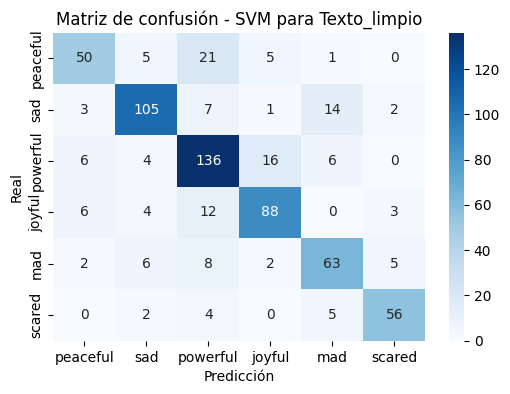

In [ ]:
#Muestra métricas para mejor resultado
muestraResultados(mejorResultado[0], yPrueba, mejorResultado[1]['y_pred'])


Modelo Naive Bayes para Texto_simple
              precision    recall  f1-score   support

      joyful       0.63      0.32      0.42        82
         mad       0.63      0.66      0.64       132
    peaceful       0.54      0.78      0.64       168
    powerful       0.61      0.60      0.60       113
         sad       0.62      0.52      0.57        86
      scared       0.72      0.42      0.53        67

    accuracy                           0.59       648
   macro avg       0.62      0.55      0.57       648
weighted avg       0.61      0.59      0.58       648



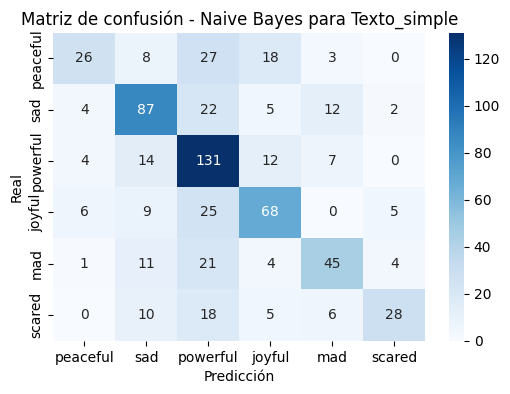

In [ ]:
#Muestra métricas para peor resultado
muestraResultados(peorResultado[0], yPrueba, peorResultado[1]['y_pred'])

**Resumen**

In [ ]:
#Importa librería
import pandas as pd

In [ ]:
#Crea DataFrame con los resultados
tablaResultados = pd.DataFrame([
    {"Modelo": nombre, "Accuracy": valores["accuracy"]}
    for nombre, valores in resultados.items()
])

In [ ]:
#Ordena de mayor a menor
tablaResultados = tablaResultados.sort_values(by="Accuracy", ascending=False).reset_index(drop=True)

In [ ]:
#Resultados
print("\nComparación de accuracies:")
print(tablaResultados)


Comparación de accuracies:
                                  Modelo  Accuracy
0                  SVM para Texto_limpio  0.768519
1  Regresión logística para Texto_limpio  0.717593
2                  SVM para Texto_simple  0.716049
3  Regresión logística para Texto_simple  0.683642
4          Naive Bayes para Texto_limpio  0.608025
5          Naive Bayes para Texto_simple  0.594136
